In [1]:
import torch
import torchvision

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append("../../../")

In [2]:
from fedlab.utils.dataset.partition import CIFAR10Partitioner
from fedlab.utils.dataset import functional as F
from fedlab.utils.functional import partition_report

In [3]:
trainset = torchvision.datasets.CIFAR10(root="../../../../data/CIFAR10/", train=True, download=True)

num_clients = 100
num_classes = 10

seed = 2021

hist_color = '#4169E1'
plt.rcParams['figure.facecolor'] = 'white'

Files already downloaded and verified


## Hetero Dirichlet

In [4]:
# perform partition
hetero_dir_part = CIFAR10Partitioner(trainset.targets, 
                                num_clients,
                                balance=None, 
                                partition="dirichlet",
                                dir_alpha=0.3,
                                seed=seed)
# save to pkl file
torch.save(hetero_dir_part.client_dict, "cifar10_hetero_dir.pkl")
print(len(hetero_dir_part))

100


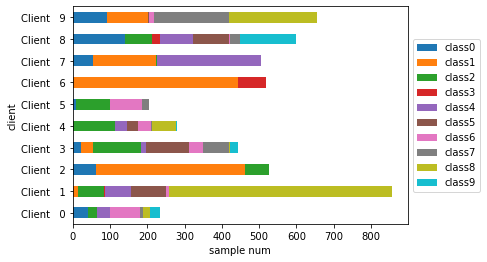

In [5]:
# generate partition report
csv_file = "../partition-reports/cifar10_hetero_dir_0.3_100clients.csv"
partition_report(trainset.targets, hetero_dir_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

hetero_dir_part_df = pd.read_csv(csv_file,header=1)
hetero_dir_part_df = hetero_dir_part_df.set_index('client')
col_names = [f"class{i}" for i in range(num_classes)]
for col in col_names:
    hetero_dir_part_df[col] = (hetero_dir_part_df[col] * hetero_dir_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
hetero_dir_part_df[col_names].iloc[:10].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/cifar10_hetero_dir_0.3_100clients.png", dpi=400, bbox_inches = 'tight')

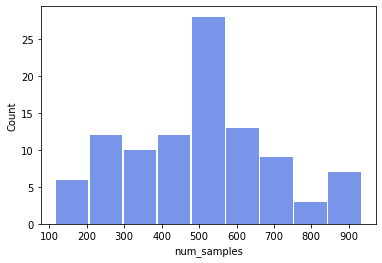

In [6]:
# plot sample number distribution for clients
clt_sample_num_df = hetero_dir_part.client_sample_count
sns.histplot(data=clt_sample_num_df, 
             x="num_samples", 
             edgecolor='none', 
             alpha=0.7, 
             shrink=0.95,
             color=hist_color)
plt.savefig(f"../imgs/cifar10_hetero_dir_0.3_100clients_dist.png", dpi=400, bbox_inches = 'tight')

## Shards Partition

In [7]:
num_shards = 200
shards_part = CIFAR10Partitioner(trainset.targets, 
                                num_clients,
                                balance=None, 
                                partition="shards",
                                num_shards=num_shards,
                                seed=seed)
# # save to pkl file
# torch.save(shards_part.client_dict, "cifar10_shards.pkl")
print(len(shards_part))

100


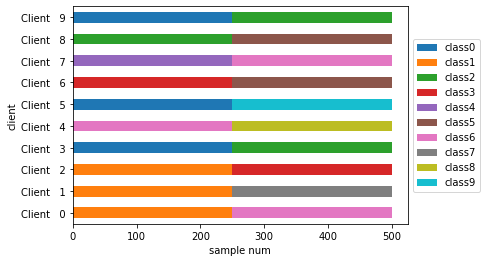

In [8]:
# generate partition report
csv_file = "../partition-reports/cifar10_shards_200_100clients.csv"
partition_report(trainset.targets, shards_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

shards_part_df = pd.read_csv(csv_file,header=1)
shards_part_df = shards_part_df.set_index('client')
col_names = [f"class{i}" for i in range(num_classes)]
for col in col_names:
    shards_part_df[col] = (shards_part_df[col] * shards_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
shards_part_df[col_names].iloc[:10].plot.barh(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/cifar10_shards_200_100clients.png", dpi=400, bbox_inches = 'tight')

## Balanced IID

In [9]:
balance_iid_part = CIFAR10Partitioner(trainset.targets, 
                                num_clients,
                                balance=True, 
                                partition="iid",
                                seed=seed)
# # save to pkl file
# torch.save(balance_iid_part.client_dict, "cifar10_balance_iid.pkl")
print(len(balance_iid_part))

100


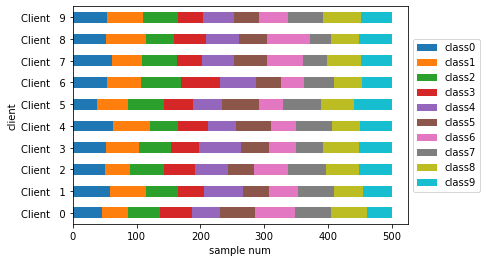

In [10]:
# generate partition report
csv_file = "../partition-reports/cifar10_balance_iid_100clients.csv"
partition_report(trainset.targets, balance_iid_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

balance_iid_part_df = pd.read_csv(csv_file,header=1)
balance_iid_part_df = balance_iid_part_df.set_index('client')
col_names = [f"class{i}" for i in range(num_classes)]
for col in col_names:
    balance_iid_part_df[col] = (balance_iid_part_df[col] * balance_iid_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
balance_iid_part_df[col_names].iloc[:10].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/cifar10_balance_iid_100clients.png", dpi=400, bbox_inches = 'tight')

## Unbalanced IID

In [11]:
unbalance_iid_part = CIFAR10Partitioner(trainset.targets, 
                                num_clients,
                                balance=False, 
                                partition="iid",
                                unbalance_sgm=0.3,
                                seed=seed)
# # save to pkl file
# torch.save(unbalance_iid_part.client_dict, "cifar10_unbalance_iid.pkl")
print(len(unbalance_iid_part))

100


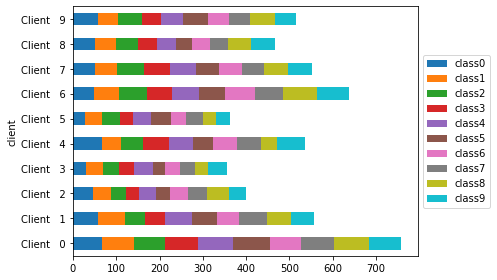

In [12]:
# generate partition report
csv_file = "../partition-reports/cifar10_unbalance_iid_unbalance_sgm_0.3_100clients.csv"
partition_report(trainset.targets, unbalance_iid_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

unbalance_iid_part_df = pd.read_csv(csv_file,header=1)
unbalance_iid_part_df = unbalance_iid_part_df.set_index('client')
col_names = [f"class{i}" for i in range(num_classes)]
for col in col_names:
    unbalance_iid_part_df[col] = (unbalance_iid_part_df[col] * unbalance_iid_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
unbalance_iid_part_df[col_names].iloc[:10].plot.barh(stacked=True)  
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlabel('sample num')
plt.savefig(f"../imgs/cifar10_unbalance_iid_unbalance_sgm_0.3_100clients.png", dpi=400, bbox_inches = 'tight')

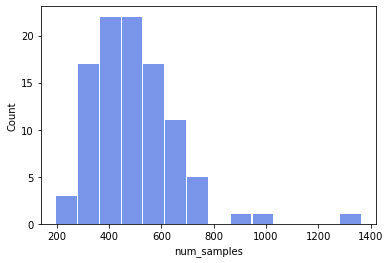

In [13]:
# plot sample number distribution for clients
clt_sample_num_df = unbalance_iid_part.client_sample_count
sns.histplot(data=clt_sample_num_df, 
             x="num_samples", 
             edgecolor='none', 
             alpha=0.7, 
             shrink=0.95,
             color=hist_color)
plt.savefig(f"../imgs/cifar10_unbalance_iid_unbalance_sgm_0.3_100clients_dist.png", dpi=400, bbox_inches = 'tight')

## Balanced Dirichlet

In [ ]:
balance_dir_part = CIFAR10Partitioner(trainset.targets, 
                                num_clients,
                                balance=True, 
                                partition="dirichlet",
                                dir_alpha=0.3,
                                seed=seed)
# # save to pkl file
# torch.save(balance_dir_part.client_dict, "cifar10_balance_dir.pkl")
print(len(balance_dir_part))

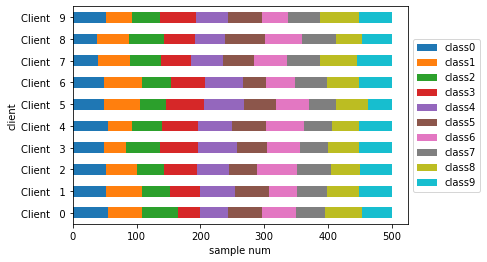

In [15]:
# generate partition report
csv_file = "../partition-reports/cifar10_balance_dir_alpha_0.3_100clients.csv"
partition_report(trainset.targets, balance_dir_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

balance_dir_part_df = pd.read_csv(csv_file,header=1)
balance_dir_part_df = balance_dir_part_df.set_index('client')
col_names = [f"class{i}" for i in range(num_classes)]
for col in col_names:
    balance_dir_part_df[col] = (balance_dir_part_df[col] * balance_dir_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
balance_dir_part_df[col_names].iloc[:10].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/cifar10_balance_dir_alpha_0.3_100clients.png", dpi=400, bbox_inches = 'tight')

## Unbalanced Dirichlet

In [ ]:
unbalance_dir_part = CIFAR10Partitioner(trainset.targets, 
                                num_clients,
                                balance=False, 
                                partition="dirichlet",
                                unbalance_sgm=0.3,
                                dir_alpha=0.3,
                                seed=seed)
# # save to pkl file
# torch.save(unbalance_dir_part.client_dict, "cifar10_unbalance_dir.pkl")
print(len(unbalance_dir_part))

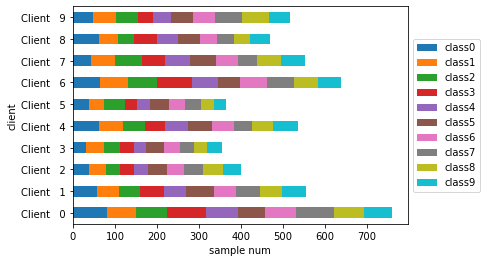

In [17]:
# generate partition report
csv_file = "../partition-reports/cifar10_unbalance_dir_alpha_0.3_unbalance_sgm_0.3_100clients.csv"
partition_report(trainset.targets, unbalance_dir_part.client_dict, 
                 class_num=num_classes, 
                 verbose=False, file=csv_file)

unbalance_dir_part_df = pd.read_csv(csv_file,header=1)
unbalance_dir_part_df = unbalance_dir_part_df.set_index('client')
col_names = [f"class{i}" for i in range(num_classes)]
for col in col_names:
    unbalance_dir_part_df[col] = (unbalance_dir_part_df[col] * unbalance_dir_part_df['Amount']).astype(int)

# select first 10 clients for bar plot
unbalance_dir_part_df[col_names].iloc[:10].plot.barh(stacked=True)  
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('sample num')
plt.savefig(f"../imgs/cifar10_unbalance_dir_alpha_0.3_unbalance_sgm_0.3_100clients.png", dpi=400, bbox_inches = 'tight')

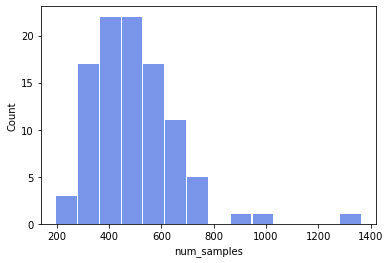

In [18]:
# plot sample number distribution for clients
clt_sample_num_df = unbalance_dir_part.client_sample_count
sns.histplot(data=clt_sample_num_df, 
             x="num_samples", 
             edgecolor='none', 
             alpha=0.7, 
             shrink=0.95,
             color=hist_color)
plt.savefig(f"../imgs/cifar10_unbalance_dir_alpha_0.3_unbalance_sgm_0.3_100clients_dist.png", dpi=400, bbox_inches = 'tight')